#ASSIPGNMENT

QUES1. What is Boosting in Machine Learning? Explain how it improves weak learners.
- Boosting is an ensemble learning technique in machine learning that combines multiple weak learners to create a strong model.

A weak learner is a simple model that performs only slightly better than random guessing (e.g., a shallow decision tree). Boosting trains these weak learners sequentially, where each new learner focuses on correcting the mistakes of the previous ones.

How it improves weak learners:
1. Boosting assigns higher weights to misclassified samples so the next learner pays more attention to them.
2. Multiple weak learners are combined, and their predictions are aggregated (e.g., weighted voting or averaging).
3. This sequential correction reduces bias and improves accuracy.

QUES2.What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
- Both AdaBoost and Gradient Boosting are boosting algorithms, but they differ in how they improve weak learners:

1. AdaBoost:
- Works by reweighting misclassified samples.
- At each step, it assigns higher weights to samples that were misclassified.
- The next weak learner focuses more on difficult samples.
- Final prediction is based on weighted majority voting (classification) or weighted averaging (regression).

2. Gradient Boosting:
- Uses gradient descent to minimize the loss function.
- At each step, it fits a new weak learner on the residual errors (the difference between predictions and actual values).
- It focuses on correcting the prediction errors directly using gradients.

QUES3.How does regularization help in XGBoost?
- Regularization in XGBoost helps control model complexity and prevent overfitting.

Key points:
1. XGBoost includes L1 (Lasso) and L2 (Ridge) regularization terms in its objective function.
2. L1 regularization makes the model sparse by driving some weights to zero, leading to simpler trees.
3. L2 regularization penalizes large weights, making the model more stable and reducing variance.
4. By limiting tree depth and controlling leaf weights, XGBoost creates models that generalize better on unseen data.

QUES4.Why is CatBoost considered efficient for handling categorical data?
- CatBoost is specifically designed to handle categorical features effectively.

Reasons:
1. CatBoost uses "ordered boosting," which avoids target leakage when encoding categorical variables.
2. It converts categorical values into numerical representations using combinations and statistics instead of one-hot encoding, which saves memory and computation.
3. It automatically handles categorical variables without heavy preprocessing.
4. The algorithm is optimized to reduce overfitting and provides fast training.

QUES5.What are some real-world applications where boosting techniques are preferred over bagging methods?
- Boosting is preferred over bagging in applications where high accuracy and handling complex patterns are required.

Examples:
1. Finance: Fraud detection and credit scoring.
2. Healthcare: Disease prediction and medical diagnosis using genetic data.
3. Marketing: Customer churn prediction and recommendation systems.
4. Natural Language Processing (NLP): Sentiment analysis, spam detection.
5. Image recognition: Object detection and classification tasks.



In [1]:
#QUES6
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9707602339181286


In [2]:
#QUES7
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R-squared score:", r2_score(y_test, y_pred))


R-squared score: 0.7803012822391022


In [6]:
#QUES8.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Parameter grid for learning rate
param_grid = {'learning_rate': [0.01, 0.1, 0.2]}

# GridSearchCV
grid = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Learning Rate:", grid.best_params_['learning_rate'])
print("Best Accuracy:", grid.best_score_)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:36:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:37:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:37:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:37:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:37:01] WARNING: /w

Best Learning Rate: 0.1
Best Accuracy: 0.9572415888205361


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


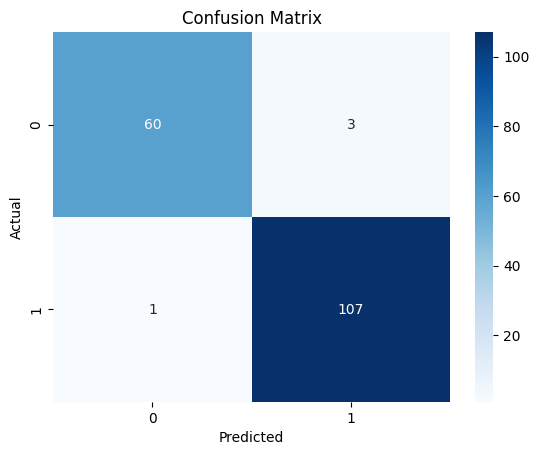

In [13]:
#QUES9

!pip install catboost

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train CatBoost Classifier
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
#QUES10.
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Assume dataset is preprocessed into X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cat = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, verbose=0)
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

'''
Step 1: Data Preprocessing
- Handle missing values (mean/median imputation for numeric, mode for categorical).
- Encode categorical features using CatBoost or one-hot encoding (if using XGBoost).
- Scale numeric values if required.

Step 2: Algorithm Choice
- CatBoost is best because it naturally handles categorical features and reduces preprocessing.
- XGBoost is also strong if categorical features are encoded.

Step 3: Hyperparameter Tuning
- Use GridSearchCV or RandomizedSearchCV.
- Tune learning rate, depth, number of estimators.

Step 4: Evaluation Metrics
- Since dataset is imbalanced, accuracy is not enough.
- Use AUC-ROC, Precision, Recall, and F1-score to evaluate properly.

Step 5: Business Benefit
- The model helps identify customers likely to default, allowing the company to reduce financial risk, adjust credit policies, and improve profit margins.

Python Example:
'''

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

ROC-AUC: 0.9794973544973544


'\nStep 1: Data Preprocessing\n- Handle missing values (mean/median imputation for numeric, mode for categorical).\n- Encode categorical features using CatBoost or one-hot encoding (if using XGBoost).\n- Scale numeric values if required.\n\nStep 2: Algorithm Choice\n- CatBoost is best because it naturally handles categorical features and reduces preprocessing.\n- XGBoost is also strong if categorical features are encoded.\n\nStep 3: Hyperparameter Tuning\n- Use GridSearchCV or RandomizedSearchCV.\n- Tune learning rate, depth, number of estimators.\n\nStep 4: Evaluation Metrics\n- Since dataset is imbalanced, accuracy is not enough.\n- Use AUC-ROC, Precision, Recall, and F1-score to evaluate properly.\n\nStep 5: Business Benefit\n- The model helps identify customers likely to default, allowing the company to reduce financial risk, adjust credit policies, and improve profit margins.\n\nPython Example:\n'